In [132]:
### Remove StopWords
from nltk.corpus import stopwords
f=open("stopwords.txt",'r',encoding="utf-8")
stopword = ['?'] 
ignore_word=f.read().splitlines()
f.close()
stopword.extend(ignore_word)
print (stopword)
data='ምህንድስና ምንድ ነው? እስኪ ንገረኝ ምን ያህል ነው ጠቃሚ የሆነው?'

data1=remove_stopwords(data)

print (data)
print (data1)

def remove_stopwords(text):
	modified_word_list=[word for word in text if word not in stopword]
	return modified_word_list

['?', 'ተብሎ', 'የሚጠራ', 'ሲሆን', 'ይህም', 'ወይም', 'በሌሎች', 'ላይ', 'ነው', 'በ ', 'የ ', 'ከ', 'ሊሆኑ', 'ማለት', 'ይችላሉ', 'ወይ', 'ይችላል', 'በጣም', 'ከመሆን', 'የተነሳ', 'ወደ', 'ሙሉ', 'አይነት', 'ጨምሮ', 'የአንድ', 'አንድ', 'ግለሰብ', 'የሆነ', 'ሁኔታ', 'ውስጥ', 'ናቸው', 'ማለትም', 'የሚገኙ', 'በአደገኛ', 'አደገኛ', 'ወይንም', 'በአንድ', 'እንዲሁም', 'ሲሆን', 'በግዜው', 'ጨምሮ', 'ያሉ', 'ሰዎች', 'በአብዛኛውን', 'ሰው', 'ምንም', 'ሆኖ', 'ከሰው', 'ወደ', 'ከባድ', 'ምንድ', 'ምንድን', 'ምንድነው', 'ምንድናቸው', 'ነው', 'ናቸው', 'ስንል', 'ምን', 'ማለታችን', 'ማለት', 'አለው', 'የምን', 'የያዘው', 'እንዴት', 'የያዘውን', 'ሊሆን', 'የምን', 'በምን', 'የሚችል', 'ማን', 'በተለየ', 'በአብዛኛው', 'የቱን', 'የትኛው', 'እንዴት', 'አይነቶች', 'አለብን', 'ያለብን', 'ከመያዛችን', 'በፊት', 'የመያዝ', 'አጋጣሚን', 'አጋጣሚ', 'እንዳለብን', 'አሉት', 'በሰአቱ', 'በግዜው', 'ሁሉ', 'ሁሉም', 'ሆነ', 'ሆኖም', 'ሁሉንም', 'ማለት', 'ማን', 'ብቻ', 'ነገር', 'ነገሮች', 'ናቸው', 'አሁን', 'አለ', 'እስከ', 'እንኳን', 'እስከ', 'እዚሁ', 'እና', 'እንደ', 'ከ', 'ወዘተ', 'ወይም', 'ዋና', 'ይህ', 'ደግሞ', 'ጋራ', 'ግን', 'ጋር', 'ሆኖም', 'ማን', 'ለማን', 'ማነው', 'ማንማን', 'ማንን', 'ከማንኛው', 'ማንኛው', 'በማን', 'ጥቀስ', 'ግለፅ', 'ዘርዝር', 'ጥራ', 'ምን', 'ምንድን', 'የምን', 'ለምን', 'በምን', 'ወይ', 'ይሆን', 'እንደ', 'እንዴት']


TypeError: argument of type 'WordListCorpusReader' is not iterable

In [4]:
import pandas as pd
import numpy as np
import pickle
import operator
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics.pairwise import cosine_similarity
import random
import nltk
from nltk.stem.lancaster import LancasterStemmer
f=open("stopwords.txt",'r',encoding="utf-8")
stopword = ['?'] 
ignore_word=f.read().splitlines()
f.close()
stopword.extend(ignore_word)
print (stopword)
print (stopword)

stemmer = LancasterStemmer()
def normalize(sentence):
    text=sentence.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('ዬ','የ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','ኣ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ').replace('መካኒካል','ሜካኒካል').replace('ኣ','አ').replace('ኣው','አዎ').replace('አው','አዎ').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ')
    print(text)
    return(text)

def cleanup(sentence):
    sentence_words= normalize(sentence)
    
    word_tok = nltk.word_tokenize(sentence_words)

    stemmed_words = [stemmer.stem(w) for w in word_tok if not w in stopword]
    
    return ' '.join(stemmed_words)


le = LE()
tfv = TfidfVectorizer(min_df=1)
data = pd.read_csv('data.csv')
data.dropna(inplace=True)
questions = data['Question'].values
question='ምሕንድስና ምንድ ነው? እስኪ ንገረኝ ምን ያህል ነው ጠቃሚ የሆነው?'
X = []
X.append(cleanup(question))
print(X)

['?', 'ተብሎ', 'የሚጠራ', 'ሲሆን', 'ይህም', 'ወይም', 'በሌሎች', 'ላይ', 'ነው', 'በ ', 'የ ', 'ከ', 'ሊሆኑ', 'ማለት', 'ይችላሉ', 'ወይ', 'ይችላል', 'በጣም', 'ከመሆን', 'የተነሳ', 'ወደ', 'ሙሉ', 'አይነት', 'ጨምሮ', 'የአንድ', 'አንድ', 'ግለሰብ', 'የሆነ', 'ሁኔታ', 'ውስጥ', 'ናቸው', 'ማለትም', 'የሚገኙ', 'በአደገኛ', 'አደገኛ', 'ወይንም', 'በአንድ', 'እንዲሁም', 'ሲሆን', 'በግዜው', 'ጨምሮ', 'ያሉ', 'ሰዎች', 'በአብዛኛውን', 'ሰው', 'ምንም', 'ሆኖ', 'ከሰው', 'ወደ', 'ከባድ', 'ምንድ', 'ምንድን', 'ምንድነው', 'ምንድናቸው', 'ነው', 'ናቸው', 'ስንል', 'ምን', 'ማለታችን', 'ማለት', 'አለው', 'የምን', 'የያዘው', 'እንዴት', 'የያዘውን', 'ሊሆን', 'የምን', 'በምን', 'የሚችል', 'ማን', 'በተለየ', 'በአብዛኛው', 'የቱን', 'የትኛው', 'እንዴት', 'አይነቶች', 'አለብን', 'ያለብን', 'ከመያዛችን', 'በፊት', 'የመያዝ', 'አጋጣሚን', 'አጋጣሚ', 'እንዳለብን', 'አሉት', 'በሰአቱ', 'በግዜው', 'ሁሉ', 'ሁሉም', 'ሆነ', 'ሆኖም', 'ሁሉንም', 'ማለት', 'ማን', 'ብቻ', 'ነገር', 'ነገሮች', 'ናቸው', 'አሁን', 'አለ', 'እስከ', 'እንኳን', 'እስከ', 'እዚሁ', 'እና', 'እንደ', 'ከ', 'ወዘተ', 'ወይም', 'ዋና', 'ይህ', 'ደግሞ', 'ጋራ', 'ግን', 'ጋር', 'ሆኖም', 'ማን', 'ለማን', 'ማነው', 'ማንማን', 'ማንን', 'ከማንኛው', 'ማንኛው', 'በማን', 'ጥቀስ', 'ግለፅ', 'ዘርዝር', 'ጥራ', 'ምን', 'ምንድን', 'የምን', 'ለምን', 'በምን', 'ወይ', 'ይሆን', 'እንደ', 'እንዴት']
['?', '

In [5]:
import pandas as pd
import numpy as np
import pickle
import operator

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
#import pydotplus

from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics.pairwise import cosine_similarity
import random
import nltk
from nltk.stem.lancaster import LancasterStemmer

f=open("stopwords.txt",'r',encoding="utf-8")
stopword = ['?'] 
ignore_word=f.read().splitlines()
f.close()
stopword.extend(ignore_word)
print (stopword)
print (stopword)

stemmer = LancasterStemmer()
def normalize(sentence):
    text=sentence.replace('ኀ','ሀ').replace('ሐ','ሀ').replace('ሃ','ሀ').replace('ኃ','ሀ').replace('ሓ','ሀ').replace('ኁ','ሁ').replace('ሑ','ሁ').replace('ሒ','ሂ').replace('ኂ','ሂ').replace('ኄ','ሄ').replace('ሔ','ሄ').replace('ሕ','ህ').replace('ኅ','ህ').replace('ሖ','ሆ').replace('ኆ','ሆ').replace('ጸ','ፀ').replace('ጹ','ፁ').replace('ጺ','ፂ').replace('ጻ','ፃ').replace('ጼ','ፄ').replace('ጽ','ፅ').replace('ጾ','ፆ').replace('ቸ,','ቼ').replace('ሸ','ሼ').replace('ዬ','የ').replace('ዉ','ው').replace('ሓ','ሀ').replace('ሠ','ሰ').replace('ሡ','ሱ').replace('ሢ','ሲ').replace('ሣ','ሳ').replace('ሤ','ሴ').replace('ሥ','ስ').replace('ሦ','ሶ').replace('ዐ','አ').replace('ዑ','ኡ').replace('ዒ','ኢ').replace('ዓ','ኣ').replace('ዔ','ኤ').replace('ዕ','እ').replace('ዖ','ኦ').replace('መካኒካል','ሜካኒካል').replace('ኣ','አ').replace('ኣው','አዎ').replace('አው','አዎ').replace('ኢንጂነሪንግ','ምህንድስና').replace('ሰፍትዌር','ሶፍትዌር').replace('ሲስተም','ስይስተም').replace('ከሚካል','ኬሚካል').replace('ደምወዝ','ደሞዝ').replace('ዶሞዝ','ደሞዝ').replace('አርኪተክቸር','አርክተክቸር').replace('ኢሌክትሪካል','ኤሌክትሪካል').replace('ኮምፒተር','ኮምፕዩተር').replace('ሳይነስ','ሳይንስ').replace('ኢንፎርመሽን','ኢንፎርሜሽን').replace('ኢንዱስትርያል','ኢንዳስትሪያል').replace('ኢንዱስትሪያል','ኢንዳስትሪያል').replace('መሃንዲስ','መሀንድስ')

    return(text)


def cleanup(sentence):
    sentence_words= normalize(sentence)
    
    word_tok = nltk.word_tokenize(sentence_words)

    stemmed_words = [stemmer.stem(w) for w in word_tok if not w in stopword]
    
    return ' '.join(stemmed_words)


le = LE()

tfv = TfidfVectorizer(min_df=1,)

data = pd.read_csv('data.csv')
data.dropna(inplace=True)
questions = data['Question'].values

X = []
for question in questions:
    X.append(cleanup(question))

tfv.fit(X)
le.fit(data['Class'])

X = tfv.transform(X)
y = le.transform(data['Class'])


trainx, testx, trainy, testy = tts(X, y, test_size=.2, random_state=42)

model = SVC(kernel='linear')
model.fit(trainx, trainy)

model1 = LogisticRegression()
model1.fit(trainx, trainy)

model2 = MultinomialNB()
model2.fit(trainx, trainy)

model3 = DecisionTreeClassifier()
model3.fit(trainx, trainy)

print("SVC test accuracy:", model.score(testx, testy))
print("SVC train accuracy:", model.score(trainx, trainy))
print("\n")
print("MultinomialNB test accuracy:", model2.score(testx, testy))
print("MultinomialNB train accuracy:", model2.score(trainx, trainy))
print("\n")
print("LogisticRegression test accuracy:", model1.score(testx, testy))
print("LogisticRegression train accuracy:", model1.score(trainx, trainy))
print("\n")
print("DecisionTreeClassifier test accuracy:", model3.score(testx, testy))
print("DecisionTreeClassifier train accuracy:", model3.score(trainx, trainy))

['?', 'ተብሎ', 'የሚጠራ', 'ሲሆን', 'ይህም', 'ወይም', 'በሌሎች', 'ላይ', 'ነው', 'በ ', 'የ ', 'ከ', 'ሊሆኑ', 'ማለት', 'ይችላሉ', 'ወይ', 'ይችላል', 'በጣም', 'ከመሆን', 'የተነሳ', 'ወደ', 'ሙሉ', 'አይነት', 'ጨምሮ', 'የአንድ', 'አንድ', 'ግለሰብ', 'የሆነ', 'ሁኔታ', 'ውስጥ', 'ናቸው', 'ማለትም', 'የሚገኙ', 'በአደገኛ', 'አደገኛ', 'ወይንም', 'በአንድ', 'እንዲሁም', 'ሲሆን', 'በግዜው', 'ጨምሮ', 'ያሉ', 'ሰዎች', 'በአብዛኛውን', 'ሰው', 'ምንም', 'ሆኖ', 'ከሰው', 'ወደ', 'ከባድ', 'ምንድ', 'ምንድን', 'ምንድነው', 'ምንድናቸው', 'ነው', 'ናቸው', 'ስንል', 'ምን', 'ማለታችን', 'ማለት', 'አለው', 'የምን', 'የያዘው', 'እንዴት', 'የያዘውን', 'ሊሆን', 'የምን', 'በምን', 'የሚችል', 'ማን', 'በተለየ', 'በአብዛኛው', 'የቱን', 'የትኛው', 'እንዴት', 'አይነቶች', 'አለብን', 'ያለብን', 'ከመያዛችን', 'በፊት', 'የመያዝ', 'አጋጣሚን', 'አጋጣሚ', 'እንዳለብን', 'አሉት', 'በሰአቱ', 'በግዜው', 'ሁሉ', 'ሁሉም', 'ሆነ', 'ሆኖም', 'ሁሉንም', 'ማለት', 'ማን', 'ብቻ', 'ነገር', 'ነገሮች', 'ናቸው', 'አሁን', 'አለ', 'እስከ', 'እንኳን', 'እስከ', 'እዚሁ', 'እና', 'እንደ', 'ከ', 'ወዘተ', 'ወይም', 'ዋና', 'ይህ', 'ደግሞ', 'ጋራ', 'ግን', 'ጋር', 'ሆኖም', 'ማን', 'ለማን', 'ማነው', 'ማንማን', 'ማንን', 'ከማንኛው', 'ማንኛው', 'በማን', 'ጥቀስ', 'ግለፅ', 'ዘርዝር', 'ጥራ', 'ምን', 'ምንድን', 'የምን', 'ለምን', 'በምን', 'ወይ', 'ይሆን', 'እንደ', 'እንዴት']
['?', '

In [6]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

#model = LogisticRegression()
#model.fit(X_train, y_train)

print("LogisticRegression classifier result\n")
result = model1.score(testx, testy)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model1.predict(testx)

f1=f1_score(testy, y_pred, average="macro")
precision=precision_score(testy, y_pred, average="macro")
recall=recall_score(testy, y_pred, average="macro")
#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100))

print("\nMultinomialNB classifier result")
result = model2.score(testx, testy)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model2.predict(testx)

f1=f1_score(testy, y_pred, average="macro")
precision=precision_score(testy, y_pred, average="macro")
recall=recall_score(testy, y_pred, average="macro")
#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100))

print("\nDecisionTreeClassifier result")

result = model3.score(testx, testy)
print("Accuracy: %.3f%%" % (result*100.0))
y_pred = model3.predict(testx)

f1=f1_score(testy, y_pred, average="macro")
precision=precision_score(testy, y_pred, average="macro")
recall=recall_score(testy, y_pred, average="macro")
#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100)) 

print("\nSVM Classifier result")

result = model.score(testx, testy)
print("Accuracy: %.2f%%" % (result*100.0))
y_pred = model.predict(testx)


f1=f1_score(testy, y_pred, average="macro")
precision=precision_score(testy, y_pred, average="macro")
recall=recall_score(testy, y_pred, average="macro")
#y_pred = model.predict(testx)
print("F1 Score: %.2f%%" % (f1*100))
print("Precision Score: %.2f%%" % (precision*100)) 
print("Recall Score: %.2f%%" % (recall*100))


LogisticRegression classifier result

Accuracy: 37.383%
F1 Score: 30.31%
Precision Score: 30.33%
Recall Score: 34.10%

MultinomialNB classifier result
Accuracy: 22.430%
F1 Score: 18.08%
Precision Score: 18.14%
Recall Score: 20.59%

DecisionTreeClassifier result
Accuracy: 49.533%
F1 Score: 37.43%
Precision Score: 38.17%
Recall Score: 41.77%

SVM Classifier result
Accuracy: 48.60%
F1 Score: 38.71%
Precision Score: 38.21%
Recall Score: 42.46%


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(testy, y_pred, model3.classes_, ymap=None, figsize=(40,30))

C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


<Figure size 4000x3000 with 2 Axes>

In [6]:
### Checking Accuracy of the Classifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

#X_train, X_test, Y_train, Y_test = train_test_split(data["question"], data["answer"], random_state=0)

Y_pred=[]
for i in testx:
    prediction=model3.predict(i)
    print(prediction)
    Y_pred.append(prediction)
print (Y_pred)
print (testy)
cnf_matrix = confusion_matrix(testy,Y_pred)
print (cnf_matrix)

C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[111]
[16]
[98]
[74]
[17]
[5]
[17]
[58]
[12]
[45]
[82]
[33]
[2]
[81]
[74]
[58]
[11]
[7]
[24]
[62]
[17]
[38]
[102]
[85]
[17]
[36]
[26]
[12]
[39]
[11]
[30]
[59]
[11]
[5]
[11]
[52]
[39]
[17]
[56]
[82]
[93]
[94]
[1]
[0]
[56]
[3]
[17]
[35]
[24]
[103]
[21]
[91]
[84]
[84]
[56]
[46]
[21]
[103]
[23]
[4]
[75]
[17]
[82]
[11]
[11]
[65]
[95]
[74]
[56]
[35]
[14]
[69]
[17]
[92]
[12]
[3]
[90]
[67]
[84]
[11]
[12]
[62]
[17]
[17]
[91]
[83]
[62]
[27]
[17]
[14]
[59]
[77]
[82]
[22]
[2]
[1]
[84]
[98]
[33]
[73]
[98]
[92]
[2]
[48]
[53]
[31]
[53]
[array([111], dtype=int64), array([16], dtype=int64), array([98], dtype=int64), array([74], dtype=int64), array([17], dtype=int64), array([5], dtype=int64), array([17], dtype=int64), array([58], dtype=int64), array([12], dtype=int64), array([45], dtype=int64), array([82], dtype=int64), array([33], dtype=int64), array([2], dtype=int64), array([81], dtype=int64), array([74], dtype=int64), array([58], dtype=int64), array([11], dtype=int64), array([7], dtype=int64), array(

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


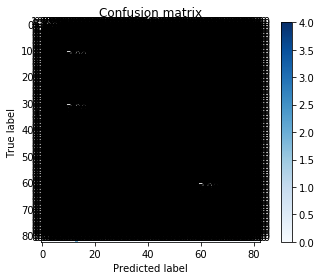

In [7]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
plot_confusion_matrix(cnf_matrix, classes=["+","-"],title='Confusion matrix')

In [51]:
dot_data = StringIO()
export_graphviz(model3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

print (graph)
graph.write_pdf("iris.pdf")
from IPython.display import Image

Image(graph.create_png())

InvocationException: Program terminated with status: 3221225477. stderr follows: []

In [8]:

def chat():
    print("Bot: Hi, Welcome to our bank!")
    while True:
        usr = input("You: ")
        if usr=='ቻው':
            break
        t_usr = tfv.transform([cleanup(usr.strip().lower())])
        class_ = le.inverse_transform(model.predict(t_usr)[0])
        questionset = data[data['Class']==class_]

        #print("Question classified under category:", class_)
       # print("{} Questions belong to this class".format(len(questionset)))

        cos_sims = []
        for question in questionset['Question']:
            sims = cosine_similarity(tfv.transform([question]), t_usr)
            cos_sims.append(sims)
            
        ind = cos_sims.index(max(cos_sims))
        sim=max(cos_sims)
        print(sim)
        if sim>=0.6:
            print("FAQBot:", data['Answer'][questionset.index[ind]])
        elif sim>0.3:
            print("FAQBot: ይቅርታ አልገባኝም አስተካክለህ ፃፈው። እንደመሰለኝ ከሆነ ግን እንዲህ ነው: \n")
            print(data['Answer'][questionset.index[ind]])
        elif sim<=0.3:
            print("FAQBot: ይቅርታ በደምብ አልገባኝም")
            

chat()


Bot: Hi, Welcome to our bank!
You: hi


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[0.]]
FAQBot: ይቅርታ በደምብ አልገባኝም
You: ሰላም


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[1.]]
FAQBot: ሰላማት ምን ላግዛቹ
You: ምህንድስና ምንድ ነው


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[1.]]
FAQBot: በመተርጎሚያ ላይ በፍልስፍና ውስጥ የሳይንስና የሂሳብ ተግባራዊ ትግበራ ተብሏል። በሳይንስ (በሂሳብ እርዳታ) ወደ ህይወት ተግባራዊ ፣ ተጨባጭ የዓለም ነገሮች የሚያሳይ ነው።ስለዚህ በትክክለኛ እውነታ, ምህንድስና የተተገበረ ሳይንስ ነው።
You: ኬሚካል ምህንድስና


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[0.69547639]]
FAQBot: ተግባራዊ ችግሮችን ለመፍታት ወይም ጠቃሚ ምርቶችን ለማምረት ኬሚካዊ ግብረመልሶችን የሚፈጽሙ ማሽኖች እና የዕፅዋቶች ዲዛይን ፣ ግንባታ እና አሠራር የሚመለከተው የምህንድስና ቅርንጫፍ ነው ፡፡
You: ፈተና 


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[0.57607179]]
FAQBot: ይቅርታ አልገባኝም አስተካክለህ ፃፈው። እንደመሰለኝ ከሆነ ግን እንዲህ ነው: 

ተማሪው በሆስፒታል መተኛት ወይም አደጋዎች ፣ ሥነ ልቦናዊ ችግሮች ፣ በወሊድ ምክንያት ወዘተ ያሉ ሁኔታዎችን በፈተና ካልነበረ ፈተናው ለመፈተን ከቀጣዩ ሴሚስተር ትምህርት ከጀመረ በኋላ በአንድ ሳምንት ውስጥ ከሚከተሉት ሰነዶች አንዱን ማቅረብ አለበት-1. ለሕክምና እና ለሥነ ልቦና ችግሮች የህክምና የምስክር ወረቀቶች ፣ 2. ከሌሎች ማህበራዊ ችግሮች በፍርድ ቤት የተረጋገጠ ሰነዶች; 3. በሌሎች ምክንያቶች የተነሳ ከሆነ ከሚመለከታቸው የመንግሥት ቢሮዎች የተረጋገጠ ሰነድ፡፡
You: ፈተና አለምፈተን


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[0.57607179]]
FAQBot: ይቅርታ አልገባኝም አስተካክለህ ፃፈው። እንደመሰለኝ ከሆነ ግን እንዲህ ነው: 

ተማሪው በሆስፒታል መተኛት ወይም አደጋዎች ፣ ሥነ ልቦናዊ ችግሮች ፣ በወሊድ ምክንያት ወዘተ ያሉ ሁኔታዎችን በፈተና ካልነበረ ፈተናው ለመፈተን ከቀጣዩ ሴሚስተር ትምህርት ከጀመረ በኋላ በአንድ ሳምንት ውስጥ ከሚከተሉት ሰነዶች አንዱን ማቅረብ አለበት-1. ለሕክምና እና ለሥነ ልቦና ችግሮች የህክምና የምስክር ወረቀቶች ፣ 2. ከሌሎች ማህበራዊ ችግሮች በፍርድ ቤት የተረጋገጠ ሰነዶች; 3. በሌሎች ምክንያቶች የተነሳ ከሆነ ከሚመለከታቸው የመንግሥት ቢሮዎች የተረጋገጠ ሰነድ፡፡
You: ኢንዴት ነህ


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[1.]]
FAQBot: ሰላም ምን ላግዝህ/ሽ
You: ምንም


C:\Users\GoitoM\.conda\envs\chatbot\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[[0.]]
FAQBot: ይቅርታ በደምብ አልገባኝም
You: ቻው
